In [7]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import vector as vec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


from plotting.plot_point_cloud import plot_point_cloud
plt.rcParams["figure.dpi"]=500
plt.rcParams["text.usetex"]=True
%matplotlib inline

In [8]:
def myhist(X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', alpha=1, fill='stepfilled', range=None, label="data"):
  #plt.figure(dpi=100)
  if range==None:
    plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, label=label)
  else:
    plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, range=range, label=label)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid()


In [9]:
def plot_multilayers():
  ax1 = fig.add_subplot(111, projection='3d')
  ax1.plot(np.transpose(np.array(delta_phi[i])), np.transpose(np.array(delta_eta[i])), np.transpose(np.array(delta_z[i])), 'k.', alpha=0.3)
  #Use one less element than bin edges to give rough bin location
  X, Y = np.meshgrid(binedges[0][:-1], binedges[1][:-1])
  
  # Loop over the range of the slice locations
  for ct in [0, 1, 2, 3, 4, 5, 6]:
    cs = ax1.contourf(X, Y, hist[:, :, ct], zdir='z', offset=binedges[2][ct], cmap = plt.cm.RdYlBu_r, alpha=0.5)
  ax1.set_xlim(-0.05,0.15)
  ax1.set_ylim(-0.15,0.15)
  ax1.set_zlim(40,95)
  #plt.axis('equal')
  plt.colorbar(cs)
  plt.show()

In [10]:
def myhist2d(X, Y, bins=8, title='title', xlabel='time(ns)', ylabel='Counnts / bin', cmap=plt.cm.jet, label="data", range=None, weights=None):
  if range==None and np.all(weights==None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins,cmap=cmap, label=label)
  elif range==None and np.all(weights!=None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins,cmap=cmap, label=label, weights=weights)
  elif range!=None and np.all(weihgts==None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins, cmap=cmap, label=label, range=range)
  
  else:
    plt.hist2d(np.array(X), np.array(Y), bins=bins, cmpa=cmap, range=range, label=label, weights=weights)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
      


In [11]:
def scatter3D(X,Y,Z, ax, title="title", xlabel= "barycenter x [cm]", ylabel= "barycenter y [cm]", zlabel="barycenter z [cm]", color='blue', alpha=1):
  ax.scatter(X,Y,Z, color=color, alpha=alpha, marker='.', s=1)

In [12]:
#filename = 'histo_SinglePi0PU_pT20to200_eta17to27.root'
#filename = 'histo_SinglePi_correctLinks.root'
filename = 'histo_4Pions_0PU_pt10to100_eta17to27.root'
file = uproot.open(filename)

In [13]:
clusters = file["ticlDumper/clusters"]
tracksters = file["ticlDumper/tracksters"]
linkedTracksters = file["ticlDumper/linkedTracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
TICLCandidate = file["ticlDumper/candidates"]


simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]


In [14]:
clusters.keys()


['seedID',
 'energy',
 'correctedEnergy',
 'correctedEnergyUncertainty',
 'position_x',
 'position_y',
 'position_z',
 'position_eta',
 'position_phi',
 'cluster_layer_id',
 'cluster_type',
 'cluster_time',
 'cluster_timeErr',
 'cluster_number_of_hits']

In [15]:
simTICLCandidate_simTracksterCPIndex = simTICLCandidate["simTICLCandidate_simTracksterCPIndex"].array()
simTICLCandidate_pdgId = simTICLCandidate["simTICLCandidate_pdgId"].array()
simTICLCandidate_charge = simTICLCandidate["simTICLCandidate_charge"].array()

In [16]:

track_pt = tracks["track_pt"].array()
track_id = tracks["track_id"].array()
track_hgcal_eta = tracks["track_hgcal_eta"].array()
track_hgcal_phi = tracks["track_hgcal_phi"].array()
track_hgcal_z = tracks["track_hgcal_z"].array()
track_hgcal_pt = tracks["track_hgcal_pt"].array()
track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
track_missing_inner_hits = tracks["track_missing_inner_hits"].array()
track_nhits = tracks["track_nhits"].array()
track_quality = tracks["track_quality"].array()
track_time_mtd_err = tracks["track_time_mtd_err"].array()
track_isMuon = tracks["track_isMuon"].array()
track_isTrackerMuon = tracks["track_isTrackerMuon"].array()

In [17]:
track_boundaryX = simtrackstersSC["track_boundaryX"].array()
track_boundaryY = simtrackstersSC["track_boundaryY"].array()
track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

simTICLCandidate_time = simTICLCandidate["simTICLCandidate_time"].array()
simTICLCandidate_raw_energy = simTICLCandidate["simTICLCandidate_raw_energy"].array()
simTICLCandidate_regressed_energy = simTICLCandidate["simTICLCandidate_regressed_energy"].array()
simTICLCandidate_track_in_candidate = simTICLCandidate["simTICLCandidate_track_in_candidate"].array()

In [18]:
simTICLCandidate.keys()

['simTICLCandidate_raw_energy',
 'simTICLCandidate_regressed_energy',
 'simTICLCandidate_simTracksterCPIndex',
 'simTICLCandidate_boundaryX',
 'simTICLCandidate_boundaryY',
 'simTICLCandidate_boundaryZ',
 'simTICLCandidate_boundaryPx',
 'simTICLCandidate_boundaryPy',
 'simTICLCandidate_boundaryPz',
 'simTICLCandidate_time',
 'simTICLCandidate_caloParticleMass',
 'simTICLCandidate_pdgId',
 'simTICLCandidate_charge',
 'simTICLCandidate_track_in_candidate']

In [19]:
candidate_pdgId = TICLCandidate["candidate_pdgId"].array()
candidate_id_prob = TICLCandidate["candidate_id_probabilities"].array()
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate = TICLCandidate["track_in_candidate"].array()
candidate_energy = TICLCandidate["candidate_energy"].array()
candidate_raw_energy = TICLCandidate["candidate_raw_energy"].array()
candidate_time = TICLCandidate["candidate_time"].array()
candidate_timeErr = TICLCandidate["candidate_timeErr"].array()
NCandidates = TICLCandidate["NCandidates"]
trackstersMerged_rawEne = trackstersMerged["raw_energy"].array()

tsL_in_cand = TICLCandidate["trackstersLinked_in_candidate"].array()

In [20]:
print(tsL_in_cand[0])

[[7], [4], [13, 14], [0], [1], [2], [3], ... [9], [10], [11], [12], [15], [16], [17]]


In [21]:
ntrackstersMerged = trackstersMerged["NTrackstersMerged"]
bxM = trackstersMerged["barycenter_x"].array()
byM = trackstersMerged["barycenter_y"].array()
bzM = trackstersMerged["barycenter_z"].array()
tErr = trackstersMerged["timeError"].array()
betaM = trackstersMerged["barycenter_eta"].array()
bphiM = trackstersMerged["barycenter_phi"].array()
reg_enM = trackstersMerged["regressed_energy"].array() 

bx = tracksters["barycenter_x"].array()
by = tracksters["barycenter_y"].array()
bz = tracksters["barycenter_z"].array()

In [22]:
print(bxM[0])

[43.6, -51.1, 127, -122, -106, -132, -109, ... -95.1, -61.8, 133, 138, 138, 159]


In [23]:
ntracksters = tracksters["NTracksters"].array()
print(f"sum(ntracksters): {sum(ntracksters)}")
print(f"sum(NCandidates): {sum(NCandidates)}")

sum(ntracksters): 85818
sum(NCandidates): 0


In [24]:
recoToSim_en = associations["Mergetracksters_recoToSim_CP_sharedE"].array()
recoToSim_score = associations["Mergetracksters_recoToSim_CP_score"].array()
recoToSim_index = associations["Mergetracksters_recoToSim_CP"].array()

simToReco_en = associations["Mergetracksters_simToReco_CP_sharedE"].array()
simToReco_score = associations["Mergetracksters_simToReco_CP_score"].array()
simToReco_index = associations["Mergetracksters_simToReco_CP"].array()

simToRecoPU_en = associations["Mergetracksters_simToReco_PU_sharedE"].array()
simToRecoPU_score = associations["Mergetracksters_simToReco_PU_score"].array()
simToRecoPU_index = associations["Mergetracksters_simToReco_PU"].array()

recoToSimPU_en = associations["Mergetracksters_recoToSim_PU_sharedE"].array()
recoToSimPU_score = associations["Mergetracksters_recoToSim_PU_score"].array()
recoToSimPU_index = associations["Mergetracksters_recoToSim_PU"].array()

In [25]:
print(ak.max(recoToSim_score))

1.0


In [26]:
SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()
SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_boundary_time = simtrackstersSC["timeBoundary"].array()
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_timeErr = simtrackstersSC["timeError"].array()
SC_trackIdx = simtrackstersSC["trackIdx"].array()

In [27]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()
CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()


In [28]:
indices_linkedTracksters = linkedTracksters["clue3Dts_indices"].array()
print(indices_linkedTracksters)
print(len(indices_linkedTracksters))

#print(indices_linkedTracksters.type)
# Check to see if the indices are consitent with the number of tracksters in every event

for i, mTs in enumerate(indices_linkedTracksters): #loop over the events
  print(f"Event {i}")
  #print(f"tracksters[{i}]: {tracksters[i]}")
  print(f"len(tracksters['time'].array()[{i}]: {len(tracksters['time'].array()[i])}")
  for j in mTs: #loop over the mergedTracksters
    print(j)
  

[[[0], [1], [2], [3], [4, 7, 18, 8, ... [86, 70, 74, 79, 65, 67], [87], [88], [89]]]
1000
Event 0
len(tracksters['time'].array()[0]: 30
[0]
[1]
[2]
[3]
[4, 7, 18, 8, 9, 19, 17]
[5]
[6]
[10, 13, 22, 14, 23, 12, 11]
[15]
[16]
[20]
[21]
[24]
[25]
[26]
[27]
[28]
[29]
Event 1
len(tracksters['time'].array()[1]: 77
[0, 40, 28, 42]
[1]
[4, 8, 2, 26, 11, 6, 35, 12, 13]
[7, 5, 10, 41, 21, 19, 3, 9, 20]
[14]
[15]
[16]
[17]
[18]
[22]
[23]
[24]
[25]
[27]
[29]
[30]
[31]
[32]
[33]
[34]
[36]
[37]
[38]
[39]
[43]
[44]
[45]
[46]
[47]
[49]
[50, 65, 61, 71]
[51, 68, 74, 48, 56]
[52]
[53]
[54]
[55]
[57]
[58]
[59]
[60]
[62]
[63]
[64]
[66]
[67]
[69]
[70]
[72]
[73]
[75]
[76]
Event 2
len(tracksters['time'].array()[2]: 40
[0, 2, 23, 6]
[1]
[3]
[4]
[5]
[7]
[8]
[9, 12, 30]
[10, 31, 37, 26, 13, 36, 39, 33, 32, 35, 29]
[11]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[24]
[25]
[27]
[28]
[34]
[38]
Event 3
len(tracksters['time'].array()[3]: 98
[2, 8, 6, 17, 1, 0, 24, 25, 32, 9, 3]
[4]
[5]
[7]
[14, 53, 55, 16, 52, 90,

len(tracksters['time'].array()[109]: 99
[0, 6, 33, 36, 47, 32, 2, 4, 35, 46, 63, 57, 45, 38, 5, 53, 1]
[3, 9, 43, 27, 8, 50, 49, 60, 48, 7, 51]
[10]
[11]
[12]
[13]
[14, 23, 25, 69, 94, 16, 20]
[15, 91, 18, 22, 19]
[17, 70]
[21, 83, 86, 90, 78, 84, 24]
[26]
[28]
[29]
[30]
[34]
[37, 31]
[39]
[40]
[41]
[42]
[44]
[52]
[54]
[55]
[56]
[58]
[59]
[61]
[62]
[64]
[65]
[66]
[67]
[68]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[79]
[80, 81]
[82]
[85]
[87]
[88]
[89]
[92]
[93]
[95]
[96]
[97]
[98]
Event 110
len(tracksters['time'].array()[110]: 50
[3]
[4, 5, 2, 22, 1, 0, 30, 14]
[7]
[8, 10, 12, 11, 40, 48, 45, 47, 44, 49, 9, 41]
[13]
[15]
[17, 6, 16]
[18]
[20, 25, 19, 24]
[21]
[23]
[27, 29, 28, 26]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[42]
[43]
[46]
Event 111
len(tracksters['time'].array()[111]: 97
[0, 18, 19, 21]
[1]
[2, 15, 14, 13, 75, 7, 66, 82, 83, 4, 12, 11, 64]
[5]
[8, 16, 3, 68, 6, 73, 9]
[10]
[17, 22]
[20]
[23]
[24]
[25]
[26]
[27]
[30, 57, 39, 31, 51, 29, 37, 36]
[32]
[33]
[34]
[38]
[40]
[41]


Event 158
len(tracksters['time'].array()[158]: 162
[2, 4, 12, 11]
[3]
[5, 97]
[7]
[8, 6, 49, 13, 1, 15, 18, 25, 16, 61, 103, 0]
[9]
[10]
[22, 19, 79, 57, 26, 56, 44, 23, 14, 83, 75, 17, 59, 54, 64]
[24]
[31, 123, 35, 134, 138, 136, 40, 39, 32, 141, 106, 38, 122, 121, 29]
[37, 119, 109, 107, 34, 36, 129, 157, 133, 155, 151, 150, 156, 30, 33, 132, 125]
[41]
[42]
[43]
[45]
[46]
[47]
[48]
[50]
[51, 71, 96, 27, 55]
[53]
[58]
[60]
[62]
[63]
[65]
[66]
[68]
[70]
[72, 28, 21, 20, 67]
[73]
[74]
[77]
[78, 84, 52, 76, 69, 85]
[80]
[81]
[82]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[98, 100, 104, 99, 101, 95, 102]
[105]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[120]
[124]
[126]
[127, 118, 139, 131]
[128, 108]
[130]
[135]
[137]
[140]
[142]
[143]
[144]
[146]
[147, 145, 158, 148]
[149]
[152]
[153]
[154]
[159]
[160]
[161]
Event 159
len(tracksters['time'].array()[159]: 118
[0]
[2, 32, 52, 48, 50, 51, 65, 62, 66, 53, 69, 17, 46, 57, 14, 3, 6, 5, 4]
[13, 12, 11, 59, 44, 60, 68, 31, 43, 10, 36, 

len(tracksters['time'].array()[285]: 35
[0, 2, 3, 1]
[4]
[6, 10, 5, 23]
[8, 7]
[9, 26, 33]
[11]
[12]
[13]
[15]
[18]
[19]
[20, 14, 17, 16]
[21]
[22]
[24]
[25]
[27]
[28]
[29]
[30]
[31]
[32]
[34]
Event 286
len(tracksters['time'].array()[286]: 99
[0]
[2, 1, 34, 8, 39, 40, 46, 3, 44, 5, 10, 36, 6, 35]
[4]
[7, 37]
[9]
[11]
[12]
[14, 66, 63, 70, 95]
[15, 79, 13, 19]
[20, 58]
[26, 23, 29, 64, 27, 30, 77, 84, 28, 65, ... 17, 16, 25, 18, 21, 81, 22, 60, 24, 69]
[31]
[33]
[38, 32]
[41]
[42]
[43, 48]
[45]
[47]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[59]
[61]
[62]
[67]
[68]
[71]
[73]
[74]
[75]
[78]
[82]
[83]
[85]
[86, 76, 96, 72]
[87]
[88]
[89]
[90]
[92]
[93]
[97]
[98]
Event 287
len(tracksters['time'].array()[287]: 113
[2, 14, 0, 5, 4, 1, 3]
[10]
[12, 6, 7, 15, 8, 16, 43, 17, 52, 64, 18, 9, 50]
[21, 24, 31, 27, 78, 34, 84, 88, 23, 22, 20]
[28, 90]
[30]
[35]
[36]
[39, 19]
[42]
[44, 13, 53, 60, 57]
[45]
[46]
[47, 40, 54]
[48, 59, 70]
[49]
[51]
[55, 11]
[56, 37]
[58]
[61]
[62]
[65, 38, 41, 67, 6

len(tracksters['time'].array()[314]: 59
[5, 2, 8, 1, 0]
[6, 4, 10]
[7]
[9, 3]
[11]
[12]
[13, 16, 15, 29, 14, 27]
[17]
[18]
[19, 38, 22, 23, 37, 21, 20, 24]
[25]
[26]
[28]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[39]
[40]
[41]
[42]
[44, 53, 46, 55, 43, 58]
[47, 50, 51, 49, 45]
[48]
[52]
[54]
[56]
[57]
Event 315
len(tracksters['time'].array()[315]: 52
[0, 26]
[3]
[5]
[6]
[8]
[9, 42, 11, 41, 13, 7, 15, 16, 43, 40]
[12, 4]
[14, 44, 10]
[17]
[18]
[19]
[21, 20, 22, 28, 31]
[24]
[25]
[27]
[29]
[30]
[32, 2, 23, 1]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[45, 50]
[46]
[47]
[48]
[49]
[51]
Event 316
len(tracksters['time'].array()[316]: 78
[1, 2, 0, 4, 34, 3, 35, 21]
[5]
[6]
[7]
[8]
[9]
[10]
[11, 18]
[12]
[13]
[14, 17, 16, 19, 68, 53, 20, 56, 60, 55]
[15]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[36]
[38]
[39]
[40]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49, 41, 37]
[50]
[51]
[52]
[54]
[57]
[58]
[59, 75]
[61]
[64]
[65]
[69, 63, 62, 70, 66, 73, 67, 72]
[71]
[74]
[76]
[77]
Event 317
len(trackst

len(tracksters['time'].array()[336]: 66
[1, 22, 0, 4, 9, 23, 7, 28, 33, 50, 2]
[3]
[5]
[6, 40, 27]
[8]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[24]
[25]
[26]
[29]
[31, 30]
[32]
[34, 51, 36, 44, 41, 43]
[35]
[37]
[38]
[39]
[45]
[46]
[47]
[49]
[52, 42, 48]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
Event 337
len(tracksters['time'].array()[337]: 62
[1, 4, 20, 0, 16, 5, 10]
[2, 3, 8, 9, 7, 27, 6, 14, 13, 26, 12, 32, 31, 33, 37, 18, 11]
[15, 56]
[17]
[19]
[21]
[22]
[23]
[24]
[25]
[28, 36, 29]
[30]
[34]
[35]
[38]
[39, 46]
[40]
[41, 48, 50, 44, 42]
[43]
[45, 51, 49]
[47]
[52]
[53]
[54]
[55]
[57]
[58]
[59]
[60]
[61]
Event 338
len(tracksters['time'].array()[338]: 106
[0, 54, 48, 72, 55, 13, 5]
[2, 45, 4, 9, 44, 6, 7, 57, 62, 78, 71, 66, 58, 56, 1, 11, 3, 10]
[8, 47, 46]
[14]
[15]
[17, 24, 16]
[18]
[19]
[21]
[23]
[27]
[29, 28, 36, 37, 32, 26, 25, 105, 20, 22]
[33, 39, 38, 31, 34, 40, 30, 41, 35, 85, 90]
[42]
[43]
[49]
[50, 67]
[51]
[52]
[53]
[59]
[60]
[6

len(tracksters['time'].array()[370]: 33
[0, 13]
[1, 2, 3]
[6, 20, 7]
[8]
[9]
[10, 12, 4, 5]
[11]
[14]
[15]
[16]
[17]
[18]
[19]
[21]
[22]
[24]
[25]
[26]
[27]
[28]
[30, 23, 29]
[31]
[32]
Event 371
len(tracksters['time'].array()[371]: 45
[0]
[1]
[2]
[3, 15, 8, 10, 18, 7, 20]
[4]
[5]
[6]
[9]
[11, 28]
[12]
[13]
[16]
[17]
[19]
[21]
[23, 24, 22, 14]
[25]
[26]
[27]
[29, 36, 37, 30, 34, 38, 32, 40, 33, 35, 41]
[31]
[39]
[42]
[43]
[44]
Event 372
len(tracksters['time'].array()[372]: 96
[1]
[2]
[3, 5, 0, 16, 7]
[4, 9]
[6, 51, 10]
[8]
[11, 55, 17]
[12]
[13, 54, 72]
[14, 67, 15, 20, 18]
[19, 66, 60]
[24]
[25]
[26]
[28, 35, 43, 38, 94, 45, 49, 34]
[29, 32, 73, 75, 22, 80, 27, 21, 23, 41]
[30, 31, 33, 44]
[36, 42, 47, 74]
[37, 82, 46]
[39]
[40]
[48]
[50]
[52]
[53]
[56]
[57]
[58]
[59]
[61]
[62]
[63]
[64]
[65]
[68]
[69]
[70]
[71]
[76]
[77]
[78]
[79]
[81]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[95, 83]
Event 373
len(tracksters['time'].array()[373]: 109
[1]
[2]
[3]
[4]
[5]
[6, 62]
[7, 33, 9, 12

len(tracksters['time'].array()[403]: 116
[3, 6, 4, 10, 42, 1, 11, 62, 60, 61, 51, 74, 0, 16, 9, 2, 8, 7]
[5, 13, 24, 12, 48, 15, 52, 19, 23, 18, 14]
[17]
[20]
[21]
[22]
[25]
[26, 58, 43]
[27]
[28, 29, 89, 32, 30, 108, 110, 109, 115, 97, 83, 38, 34]
[31, 82, 39]
[33]
[35]
[37, 40, 88, 96, 94, 95, 85, 41, 93, 36, 86]
[44]
[45]
[46]
[47]
[49]
[50]
[53]
[54]
[55]
[56]
[57]
[59]
[63]
[64]
[65]
[66]
[68]
[69]
[70, 72, 67]
[71]
[73]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[84]
[87]
[90]
[91]
[92]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[107, 111, 106]
[112]
[113]
[114]
Event 404
len(tracksters['time'].array()[404]: 84
[0, 1, 4, 2]
[3]
[5, 9, 26, 45, 19, 33, 50, 28, 44, 24, 48, 6, 38, 7, 37, 23]
[11, 13, 60, 61, 12, 15, 14]
[16]
[17]
[18]
[20]
[21]
[22]
[29, 8, 25]
[30]
[31]
[34]
[35, 36]
[39]
[40]
[41]
[42]
[43]
[46]
[47]
[49]
[51]
[52]
[53]
[54, 32, 27]
[55]
[56]
[57]
[58]
[59]
[62]
[63]
[64]
[65]
[66]
[67, 79, 10, 74, 77, 75, 76]
[68]
[69]
[70]
[72]
[73, 71]
[78]
[80]
[81]
[82]
[83]
Event 

len(tracksters['time'].array()[439]: 71
[2]
[3]
[4]
[5, 0, 14, 42, 10]
[6]
[7]
[8, 41]
[9, 1]
[11]
[12]
[13]
[15]
[16]
[17]
[18]
[21]
[22]
[24]
[25]
[26, 23, 19, 20, 44, 28, 29, 47, 27]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[43]
[45]
[46]
[51]
[54]
[55, 68, 53, 56, 30, 50, 59, 63, 52, 48, 57, 62]
[58, 60]
[61]
[64]
[65]
[66]
[67]
[69, 49]
[70]
Event 440
len(tracksters['time'].array()[440]: 64
[0]
[2]
[3]
[4]
[5, 18]
[6]
[7]
[8, 12, 1]
[10, 17, 9]
[11]
[13]
[14]
[15]
[20, 21, 51, 25, 19, 29, 30, 23, 22]
[24, 50, 57, 28, 27, 26, 32, 49, 31, 58]
[33]
[34]
[35]
[38]
[39, 36, 16, 37]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[52]
[53]
[54]
[55]
[56]
[59]
[60]
[61]
[63, 62]
Event 441
len(tracksters['time'].array()[441]: 63
[0, 2, 21, 1]
[3]
[4]
[5, 35, 62, 6, 56, 57]
[8]
[9]
[10]
[11]
[16]
[17]
[18, 12, 13, 15, 14, 19, 23]
[20]
[22]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[36]
[37]
[38]
[39]
[40]
[41, 45, 43, 7, 46, 50, 51]
[42]
[44]
[47]
[48]
[49]
[52]
[53]
[54

len(tracksters['time'].array()[475]: 36
[0]
[1, 2, 3, 6, 23, 29, 27, 22, 33, 4]
[5]
[7]
[8]
[11, 9, 18, 17, 10]
[12]
[13]
[15]
[16]
[19, 14]
[20]
[21]
[24, 28, 26, 30]
[25]
[31]
[32]
[34]
[35]
Event 476
len(tracksters['time'].array()[476]: 75
[2, 9, 27, 34, 26, 23, 43, 12, 35, 10, 44, 11, 33, 42, 13, 46, 7, 24]
[3, 1, 36, 8, 39, 5, 6, 4, 0]
[14, 51, 16, 52, 17, 18, 59, 68, 65, 60]
[19, 20, 15, 58, 73, 72, 66, 50, 22, 64, 21, 55, 67]
[25]
[28]
[29]
[30]
[31]
[32]
[37]
[38]
[40]
[41]
[45]
[47]
[48]
[49]
[53]
[54]
[56]
[57]
[61]
[62]
[63]
[69]
[70]
[71]
[74]
Event 477
len(tracksters['time'].array()[477]: 104
[0]
[1]
[2]
[3, 7, 61, 57, 8, 51, 52, 63, 62, 81, 4, 38, 65, 12, 43, 39]
[5]
[6]
[9]
[10]
[11]
[15, 17, 29, 95, 97, 16, 27, 94, 36, 33, 13, 25]
[18]
[19]
[21]
[22, 34]
[23, 30]
[24]
[26, 20, 98, 35, 37]
[28, 14, 32]
[31, 101]
[40]
[41]
[42]
[45]
[46]
[47]
[48]
[49]
[50]
[53]
[54]
[55]
[56]
[58]
[59]
[60]
[64, 44, 70]
[66]
[67]
[68]
[69]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80

len(tracksters['time'].array()[505]: 38
[0]
[3, 2, 4, 1]
[6, 9, 5, 7, 8]
[10]
[13, 12, 19, 28, 18, 11, 16, 17, 14]
[15]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
Event 506
len(tracksters['time'].array()[506]: 135
[3, 0, 4, 5, 70, 49, 32, 64, 68, 69, 57, ... 29, 9, 12, 11, 10, 31, 8, 30, 1, 6, 2]
[13, 15, 14, 17, 89, 87, 84, 99, 79, 16, 104, 122, 88, 107, 106, 86]
[18]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27, 43]
[28]
[35]
[40, 33, 45, 44, 36, 59, 50, 53]
[41]
[42]
[46]
[47]
[48, 34]
[52]
[54, 37, 38]
[55]
[58]
[60]
[61]
[63, 62, 51]
[65]
[66]
[67]
[71]
[72]
[74]
[75]
[76]
[77]
[78]
[80]
[81]
[83]
[85]
[90]
[91]
[92]
[93, 120, 115, 109, 82]
[94]
[96, 125, 130, 132, 95, 19, 124, 103, 118, 98, 108, 102, 119]
[97, 129]
[100]
[101, 121]
[105]
[110]
[111]
[112]
[113]
[114]
[116]
[117]
[123]
[126]
[127]
[128]
[131]
[133]
[134]
Event 507
len(tracksters['time'].array()[507]: 142
[0]
[2]
[5]
[6, 3]
[11, 7, 10, 42, 16, 38]
[13, 54, 1, 9, 4, 45, 40, 61, 48

len(tracksters['time'].array()[538]: 79
[1, 33, 6, 41, 46, 35, 42, 47, 40, 12, 8, 2, 9, 5, 7, 39, 3]
[4, 0]
[10]
[11]
[13]
[15, 29, 17, 26, 27, 25, 14, 16, 61, 28]
[18, 19, 24, 30, 71, 32]
[20]
[21]
[34]
[36]
[37, 45]
[38]
[43]
[44]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59, 68]
[60, 22, 23, 62, 65, 31, 74]
[63]
[64]
[66]
[67]
[69]
[70, 72, 76]
[73]
[75]
[77]
[78]
Event 539
len(tracksters['time'].array()[539]: 117
[2, 44, 3, 74, 87, 67, 66, 48, 49, 56, 61, 59, 81, 82, 80, 50, 60]
[4, 1, 46, 71, 0]
[5]
[7, 90]
[8]
[9, 37, 114, 23, 17, 88]
[10]
[11, 113, 112]
[12, 38]
[13]
[14]
[15, 6]
[16, 22, 33]
[18]
[19]
[20, 28, 25, 24, 26]
[21, 110]
[27, 29, 92]
[30, 95, 99]
[32, 35, 102, 31, 36, 93]
[34]
[39]
[40]
[41]
[42]
[43]
[45, 51]
[47]
[52]
[53]
[54]
[55]
[57]
[58]
[62]
[63]
[64]
[65]
[68]
[69]
[70]
[72]
[73]
[75]
[76]
[77]
[79]
[83]
[84, 78]
[85]
[86]
[89]
[91]
[94]
[96]
[97]
[98]
[100]
[101]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[111]
[115]
[116]
Event 540
len(trackst

len(tracksters['time'].array()[572]: 87
[1, 35, 7, 48, 57, 52, 51, 46, 50, 10, 0, 5]
[2]
[4, 6, 43, 11, 3, 8, 36, 38]
[9]
[13]
[15, 14, 85, 34, 20, 22, 12, 18, 62, 26, 16, 63, 24, 29, 27, 75, 78, 25]
[17, 28, 66, 21, 32, 83, 23, 65, 31, 19, 61]
[30]
[33]
[37]
[39]
[40]
[42, 41]
[44]
[45]
[47]
[49]
[53]
[54]
[55]
[56]
[58]
[59]
[60]
[67, 80, 79, 64]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[76]
[77]
[81]
[82]
[84]
[86]
Event 573
len(tracksters['time'].array()[573]: 78
[2, 10, 44, 11, 53, 13, 5, 36, 8, 12, 7, 4, 37]
[3, 1, 42, 39, 15, 0, 6]
[9]
[14]
[16]
[17]
[19]
[21]
[22, 77, 20]
[23]
[25, 18]
[28, 63, 31, 24, 66]
[29]
[30]
[32]
[33, 35, 26, 27]
[34]
[38]
[40]
[41]
[43]
[45]
[46]
[47]
[48]
[49]
[50]
[51, 52]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[64]
[65]
[67]
[68]
[69, 71]
[70]
[72]
[73]
[74]
[75]
[76]
Event 574
len(tracksters['time'].array()[574]: 78
[1]
[2]
[3]
[4]
[5]
[6]
[7, 34]
[8, 0, 36]
[9, 35, 37]
[10]
[11, 45, 15, 16, 14, 47, 13, 48, 41, 46]
[12]
[21]
[22]
[23, 76, 61, 24, 6

len(tracksters['time'].array()[608]: 71
[0]
[2]
[3, 1]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[19, 22, 20, 18, 16, 32, 17, 31]
[21]
[24]
[25]
[26]
[27, 29, 35, 36, 30, 23]
[28]
[33]
[34]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58, 65]
[59]
[60]
[61]
[62]
[63]
[64]
[66]
[67]
[68]
[69]
[70]
Event 609
len(tracksters['time'].array()[609]: 51
[0]
[1, 5, 6, 7]
[2]
[3]
[4, 10, 12, 9]
[8]
[11, 13, 29, 31, 28]
[14]
[15]
[16]
[17]
[18, 20, 19]
[21]
[22, 44, 45, 24, 46]
[23]
[25]
[26]
[27]
[30]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[47]
[48]
[49]
[50]
Event 610
len(tracksters['time'].array()[610]: 117
[0]
[1, 17, 12, 21, 49, 38, 16, 65, 60, 13, 6, 18, 59, 15, 5, 4, 36, 3]
[2]
[7, 37, 10, 63, 14, 19, 43, 8, 47, 11, 41, 9]
[20]
[25, 22, 26, 33, 105, 90, 27]
[28, 30, 23, 97, 34, 24, 78, 110, 96, 103, 29, 99, 87]
[31]
[32]
[35]
[39]
[40]
[42]
[44]
[45]
[46]
[50]
[51]
[52]
[53]
[54]
[55]
[56, 58, 48,

len(tracksters['time'].array()[642]: 71
[1, 24, 32, 2, 0, 37, 35]
[3]
[4]
[6]
[8]
[9, 5, 7, 17]
[10]
[11]
[12, 21]
[13]
[14]
[15]
[16]
[18, 59, 19]
[20, 22]
[23]
[25]
[26]
[28]
[29]
[30]
[33]
[34]
[36]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51, 31, 27]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
Event 643
len(tracksters['time'].array()[643]: 83
[1, 0, 16, 42, 38, 12, 39, 17, 45, 4]
[2]
[3, 9, 29, 14, 48, 7, 5, 40, 10, 6, 8]
[11]
[13]
[15]
[18, 22, 27, 55, 20, 28, 53, 61]
[19, 67, 65, 72, 62, 75, 76, 64, 78, 25, 58, 26, 66, 24, 23]
[21]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[41]
[43]
[44]
[46]
[47]
[49]
[50]
[51]
[52]
[56]
[57]
[59]
[60]
[63]
[68]
[69, 54]
[70]
[71]
[73]
[74]
[77]
[79]
[80, 82]
[81]
Event 644
len(tracksters['time'].array()[644]: 84
[2, 0, 5, 11, 33, 7, 37, 1, 3, 8]
[4]
[6]
[9]
[10]
[12]
[16, 58, 80]
[17]
[18]
[19, 13, 14, 26, 31, 27, 29, 25]
[20]
[21, 61, 79, 28]
[22]
[23]
[24, 66, 15]
[30]
[32]


len(tracksters['time'].array()[675]: 82
[4, 3, 37, 11, 16, 59, 22, 49, 8]
[5]
[6, 9, 2, 14, 7, 19, 25, 52, 44, 15, 21, 23, 17, 50, 10, 0, 13, 1]
[12]
[18]
[24, 39, 47]
[26]
[27, 30, 70, 71, 67, 64, 34, 33, 78, 31, 29]
[28]
[32, 74, 65, 35, 73, 75, 66, 61]
[36]
[38]
[40]
[41, 45, 46]
[42]
[43]
[51, 20, 48, 55]
[53]
[54]
[56]
[57]
[58]
[60]
[62]
[63]
[68]
[69]
[72]
[76]
[77]
[79]
[80]
[81]
Event 676
len(tracksters['time'].array()[676]: 104
[11, 38, 6, 48, 2, 14, 61, 62, 54, 66, 3, 10, 12, 9, 1]
[19, 20, 33, 82, 23, 32, 92, 80, 96, 88, 25, 91, 24, 75]
[22, 35, 21, 86, 28, 78, 94, 93, 90, 98, 29, 79, 26, 74, 30, 27]
[31]
[34]
[36]
[39]
[40]
[43]
[45, 44, 51, 13, 46, 18, 5, 52, 17, 58, 4, 50, 16, 8, 0, 56, 42, 7, 59, 37]
[47, 65, 15]
[53]
[55]
[57, 49, 41]
[60]
[63]
[64]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[76]
[77]
[81]
[83]
[84]
[85]
[87, 89, 101, 99]
[95]
[97]
[100]
[102]
[103]
Event 677
len(tracksters['time'].array()[677]: 110
[1, 8, 2, 5, 0, 3, 10, 21, 9, 6]
[4, 15, 52, 11, 18, 7, 58]
[

len(tracksters['time'].array()[709]: 38
[1]
[3]
[4]
[6, 2, 5, 0]
[7]
[8, 22, 11, 15]
[9]
[10]
[12]
[13]
[14]
[16, 17]
[18]
[19]
[20]
[21]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
Event 710
len(tracksters['time'].array()[710]: 80
[0]
[2]
[3]
[4, 5]
[7, 6, 46, 8, 42, 38, 48, 17, 53, 41, 13, 35, 34, 12, 37, 10]
[9, 40, 15, 14, 1, 11]
[16]
[18]
[20, 55]
[21]
[22]
[23, 25, 19, 58]
[24]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[36]
[39]
[43]
[44]
[45]
[47]
[49]
[50]
[51]
[52]
[54]
[56]
[57]
[59]
[60]
[61]
[62]
[63, 73, 75, 76, 79, 64, 68, 72, 66]
[65]
[69]
[70]
[71]
[74, 67]
[77]
[78]
Event 711
len(tracksters['time'].array()[711]: 43
[1, 5, 0, 17, 7, 2, 23, 12]
[3, 10, 13, 6]
[4]
[8]
[9]
[11]
[14]
[15]
[16]
[18]
[19]
[20]
[21]
[22]
[24]
[25]
[27]
[28]
[30, 35, 29, 37, 34, 31, 26, 38]
[33, 32]
[39, 36, 41]
[40]
[42]
Event 712
len(tracksters['time'].array()[712]: 95
[3, 25, 26, 2, 1, 4, 33, 5, 27, 24, 0, 28]
[10, 9, 16, 6, 7, 57, 15, 18, 73, 70, 65, ... 67, 13,

len(tracksters['time'].array()[746]: 60
[0, 1]
[2]
[3, 27, 29, 26, 25, 5]
[4]
[6]
[7]
[8, 44, 12, 11]
[13, 14, 17, 19, 9, 20, 22, 21, 41, 10, 18, 49, 15]
[16]
[23]
[24]
[30]
[31, 28]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[42]
[43]
[45]
[46]
[47]
[48]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
Event 747
len(tracksters['time'].array()[747]: 139
[6, 9]
[8]
[10]
[11, 7, 21, 24, 19, 105, 112, 25, 22]
[12, 96, 97]
[13, 93]
[14, 15, 113, 23, 101, 103, 26, 102, 107]
[16]
[17, 104]
[18]
[20]
[28]
[30]
[31, 3, 0, 1, 47, 48, 34, 2, 29, 37]
[32]
[40]
[41]
[42, 44, 4, 38]
[43]
[49]
[50, 67, 69, 33, 5, 86, 76, 59, 62]
[51]
[52]
[53]
[54, 64, 45]
[55]
[57, 61]
[58, 56, 39]
[60]
[63]
[65]
[66]
[68]
[71, 46, 35, 36, 70]
[72]
[73]
[74]
[75]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[87]
[88]
[89]
[90]
[91]
[92]
[94]
[95]
[98]
[99, 27]
[100]
[106]
[109, 110, 129, 108, 117, 116, 130, 118, 124, 111, 127, 122]
[114]
[115]
[119]
[120]
[121]
[123]
[125]
[126]
[128]
[131]
[132, 137]
[133]
[134

len(tracksters['time'].array()[784]: 87
[2]
[3, 8, 6, 7, 44, 13, 1, 12, 19, 23, 53, 26, 16, 18, 51, 55, 45, 10, 0]
[4]
[9, 5, 11, 58]
[14]
[15]
[17]
[21, 28, 20, 22, 27, 48]
[24]
[25]
[31, 30]
[33, 32, 43]
[34, 70, 38, 36, 39, 37, 77, 76, 83, 82, 74, 73, 29, 68, 40]
[35, 72]
[41]
[42]
[46]
[47]
[49]
[50]
[52]
[54]
[56]
[60]
[61, 59, 57]
[62]
[63]
[64]
[65]
[66]
[67]
[69]
[71]
[75]
[78]
[79]
[80]
[81]
[84]
[85]
[86]
Event 785
len(tracksters['time'].array()[785]: 38
[1, 0, 2]
[5]
[7, 21, 20, 4, 24, 3, 22, 32, 6, 17, 15, 23]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[16]
[18]
[19]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[33]
[34]
[35]
[36]
[37]
Event 786
len(tracksters['time'].array()[786]: 71
[0, 1, 32, 9, 8, 35, 28, 31, 17, 27, 7]
[2]
[3]
[4, 25, 6, 24, 33, 36]
[5]
[10, 46]
[13]
[14]
[15]
[16]
[18]
[19]
[20]
[21]
[22]
[26]
[30, 23, 29]
[34]
[37]
[39]
[40]
[42, 43, 38, 41]
[44]
[45]
[47]
[48]
[53]
[55, 63, 61, 54, 12, 51, 11, 50, 52, 49, 56]
[57]
[58]
[59, 60]
[62, 69]
[64]
[65]
[66]
[67]
[68]
[70]
Ev

len(tracksters['time'].array()[821]: 86
[1, 6, 0, 21, 10, 33, 43, 36, 9, 28, 35, 37, 7, 5, 24, 2]
[3, 46, 22, 11, 8, 12, 31, 39]
[4]
[14]
[15, 13]
[17, 66, 18, 80, 16, 63, 75, 65, 62, 79, 72, 73, 67, 20, 51]
[19]
[23]
[25]
[26]
[27]
[29]
[30]
[32]
[34]
[38]
[40]
[41]
[42]
[44]
[45]
[47]
[48]
[49]
[50]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[64]
[68, 76, 81, 78]
[69]
[70]
[71]
[74]
[77]
[82]
[83]
[84]
[85]
Event 822
len(tracksters['time'].array()[822]: 104
[0, 34, 5, 1, 2]
[3]
[7, 9, 87, 13, 6, 22, 17, 78, 88, 90, 81, ... 79, 97, 20, 77, 18, 14, 11, 21, 16, 8]
[10]
[12, 69]
[15]
[19]
[23]
[24]
[25]
[26]
[30, 41]
[35]
[36]
[38]
[42]
[43]
[44]
[46, 33, 32, 27, 66, 28, 31, 29, 4]
[47]
[49, 40, 58, 45, 51, 37]
[52]
[53]
[54]
[55, 62, 56, 39, 64, 48, 59, 50]
[57]
[60]
[61]
[63]
[65]
[67]
[68]
[70]
[71]
[72]
[73]
[74]
[76]
[80]
[82]
[83]
[84]
[86]
[91]
[93]
[94]
[95]
[96]
[98]
[99]
[100]
[101]
[102]
[103]
Event 823
len(tracksters['time'].array()[823]: 86
[1]
[2]
[4, 47]
[5, 40, 15,

len(tracksters['time'].array()[855]: 73
[1, 3, 4, 8, 5, 0, 37, 9, 41, 13, 39, 10, 7, 46, 2]
[6]
[11]
[12]
[15]
[16]
[18, 17]
[19]
[20, 32, 25, 23, 61, 29, 66, 14, 68, 24, 28, 31, 34, 22, 27]
[21]
[26, 33, 71]
[30]
[35]
[36]
[38]
[40]
[42]
[48]
[49]
[50, 45, 44, 43]
[51]
[52]
[53, 47, 54]
[55]
[56]
[57]
[58]
[59]
[60]
[62]
[63]
[64]
[65]
[67]
[69]
[70]
[72]
Event 856
len(tracksters['time'].array()[856]: 128
[1, 10, 3, 2, 53, 0]
[6, 5, 8, 4, 65, 51, 13, 55, 60, 49, 40, 50, 7, 11, 39]
[9]
[12]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21, 105, 23, 119, 83, 22, 74, 33]
[24, 26]
[25]
[27]
[28, 81, 79, 31, 32]
[29]
[30, 86, 34, 98, 84]
[35]
[36]
[37]
[38]
[41]
[43]
[44]
[45]
[46]
[47]
[48]
[52]
[54, 42]
[56]
[57]
[58]
[59]
[61]
[62]
[63]
[64]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[75]
[77]
[78]
[80]
[82]
[85]
[87]
[88]
[91]
[92]
[93]
[94]
[95, 89, 113, 110, 96, 111, 101]
[97]
[99]
[100]
[102]
[103]
[104]
[106]
[107]
[108]
[109]
[112]
[114]
[115]
[116]
[117]
[118]
[120]
[121]
[122]
[123, 127, 76,

len(tracksters['time'].array()[890]: 106
[5, 2]
[6, 13, 9, 1, 15, 11, 51, 54, 49, 53, 50, 4, 7, 0, 14, 3, 20, 12, 8, 39]
[10]
[16]
[17]
[18]
[19]
[26, 78, 23, 80, 25, 73, 103, 21, 24, 36, ... 97, 87, 82, 85, 34, 81, 31, 35, 72]
[28, 38, 67, 76, 37]
[29]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[52]
[57]
[60]
[61]
[62]
[64, 55, 59, 63, 56, 58]
[65]
[66]
[68]
[69]
[70]
[71, 77]
[75, 27, 84, 93]
[79]
[83]
[88]
[89]
[90]
[91]
[92, 95, 32, 94]
[96]
[98]
[99]
[100]
[101]
[104]
[105, 74]
Event 891
len(tracksters['time'].array()[891]: 80
[0, 21, 4, 1, 2, 24, 30, 3, 39, 23, 19, 27]
[6]
[7, 61, 14, 15, 17, 16, 54, 57, 60, 66, 11, 52, 18, 56, 12]
[8, 58]
[9]
[10, 73, 79, 68, 5]
[13]
[20]
[22]
[25]
[26]
[28]
[29, 32, 36, 33, 34, 35]
[31]
[37]
[38]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[53]
[55]
[59]
[62]
[63]
[64]
[65]
[67]
[69, 71, 70, 78]
[72]
[74]
[75]
[76]
[77]
Event 892
len(tracksters['time'].array()[892]: 46
[1, 0, 2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10, 11]
[12]
[13]
[

len(tracksters['time'].array()[926]: 77
[0]
[2]
[3]
[4]
[5, 14, 11, 1]
[6, 51, 46]
[7, 12, 10, 13, 44]
[8]
[9]
[16]
[17]
[18, 19, 22, 27, 68, 73, 25, 74, 26, 21, 23]
[20, 65, 70, 28, 59]
[24]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38, 15, 49]
[39]
[40, 42]
[41, 43, 45]
[47]
[48]
[50]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[60]
[61]
[62]
[63]
[64]
[66]
[67]
[69]
[71]
[72]
[75]
[76]
Event 927
len(tracksters['time'].array()[927]: 64
[0]
[1, 15, 50]
[2, 6, 45]
[3, 10, 5, 11, 4, 47, 12, 42, 13]
[7]
[8]
[9]
[14]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[43]
[44]
[46, 59, 54, 51]
[48]
[49]
[52]
[53]
[55]
[56]
[57]
[58]
[60, 61]
[62]
[63]
Event 928
len(tracksters['time'].array()[928]: 102
[0]
[1]
[2]
[3]
[4]
[5]
[7, 6]
[8]
[9, 10, 33, 12, 57, 63, 52, 45, 56, 62, 60, 54, 18, 17, 11, 13]
[14, 16, 38, 15, 39, 36]
[19, 64]
[20]
[25]
[27, 66, 21, 68, 31, 24, 22, 26, 23, 74]
[28, 30, 82, 90, 69, 29]
[34]
[35]

len(tracksters['time'].array()[962]: 85
[3, 23, 12]
[4, 8, 19, 7]
[5, 2]
[9]
[10]
[11, 6, 14, 54, 62, 28, 20]
[13, 46, 21, 0, 24, 22, 27, 53, 55, 48, 56, 25, 52, 1, 15]
[16, 26]
[17]
[18]
[33, 38, 37, 43, 70, 35, 67, 31, 41, 32, 36]
[40, 45, 30, 29, 75, 34, 65, 68, 72, 39]
[42]
[44]
[47]
[49]
[50]
[51]
[57]
[58]
[59]
[60]
[61]
[63]
[64]
[66]
[69]
[71]
[73]
[74]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
Event 963
len(tracksters['time'].array()[963]: 100
[2, 5, 0, 13, 15, 60, 56, 41, 42, 47, 39, 10, 3, 9, 7, 11, 6, 1]
[4, 49, 59, 54]
[8, 50, 17, 46, 16]
[12, 51]
[14]
[19, 28, 36, 31, 24, 34, 83, 21, 30, 27, 79, 37, 35, 25, 18, 20, 32, 26, 22, 77]
[23]
[29, 91]
[33]
[38]
[40]
[43]
[44]
[45]
[48, 67, 58]
[52]
[53]
[55, 57]
[61]
[62]
[63]
[64]
[65]
[66]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[78, 81, 82, 94, 87, 96, 86]
[80]
[84]
[85]
[88]
[89]
[90]
[92]
[93]
[95]
[97]
[98]
[99]
Event 964
len(tracksters['time'].array()[964]: 83
[0]
[1, 4]
[2, 23, 39, 5, 26, 8, 9, 11]
[3]
[6]
[7, 15

len(tracksters['time'].array()[998]: 73
[0]
[3]
[4]
[5]
[7]
[8]
[9]
[10, 44, 28, 11, 1]
[12]
[13]
[14, 6]
[15, 18, 17]
[16, 19, 43, 22, 21, 2]
[20]
[23]
[24]
[25]
[26]
[27]
[30, 59, 29, 56, 55, 54, 57]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[58]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
Event 999
len(tracksters['time'].array()[999]: 90
[3]
[6, 9, 44]
[7, 13, 26]
[10, 8]
[14, 12, 35]
[16, 38, 4, 29, 45, 39, 41]
[17, 5, 1, 25, 27, 2, 28, 0, 18, 23]
[19]
[20, 47, 32, 34, 30, 11, 36, 37]
[21, 15]
[22]
[24]
[31]
[33]
[40]
[42]
[43]
[46]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[60, 77, 75, 71, 59, 61, 78, 58]
[62]
[63]
[66]
[72]
[73]
[76, 68, 83, 69, 64]
[80]
[81]
[82]
[84]
[85]
[86, 70, 74, 79, 65, 67]
[87]
[88]
[89]


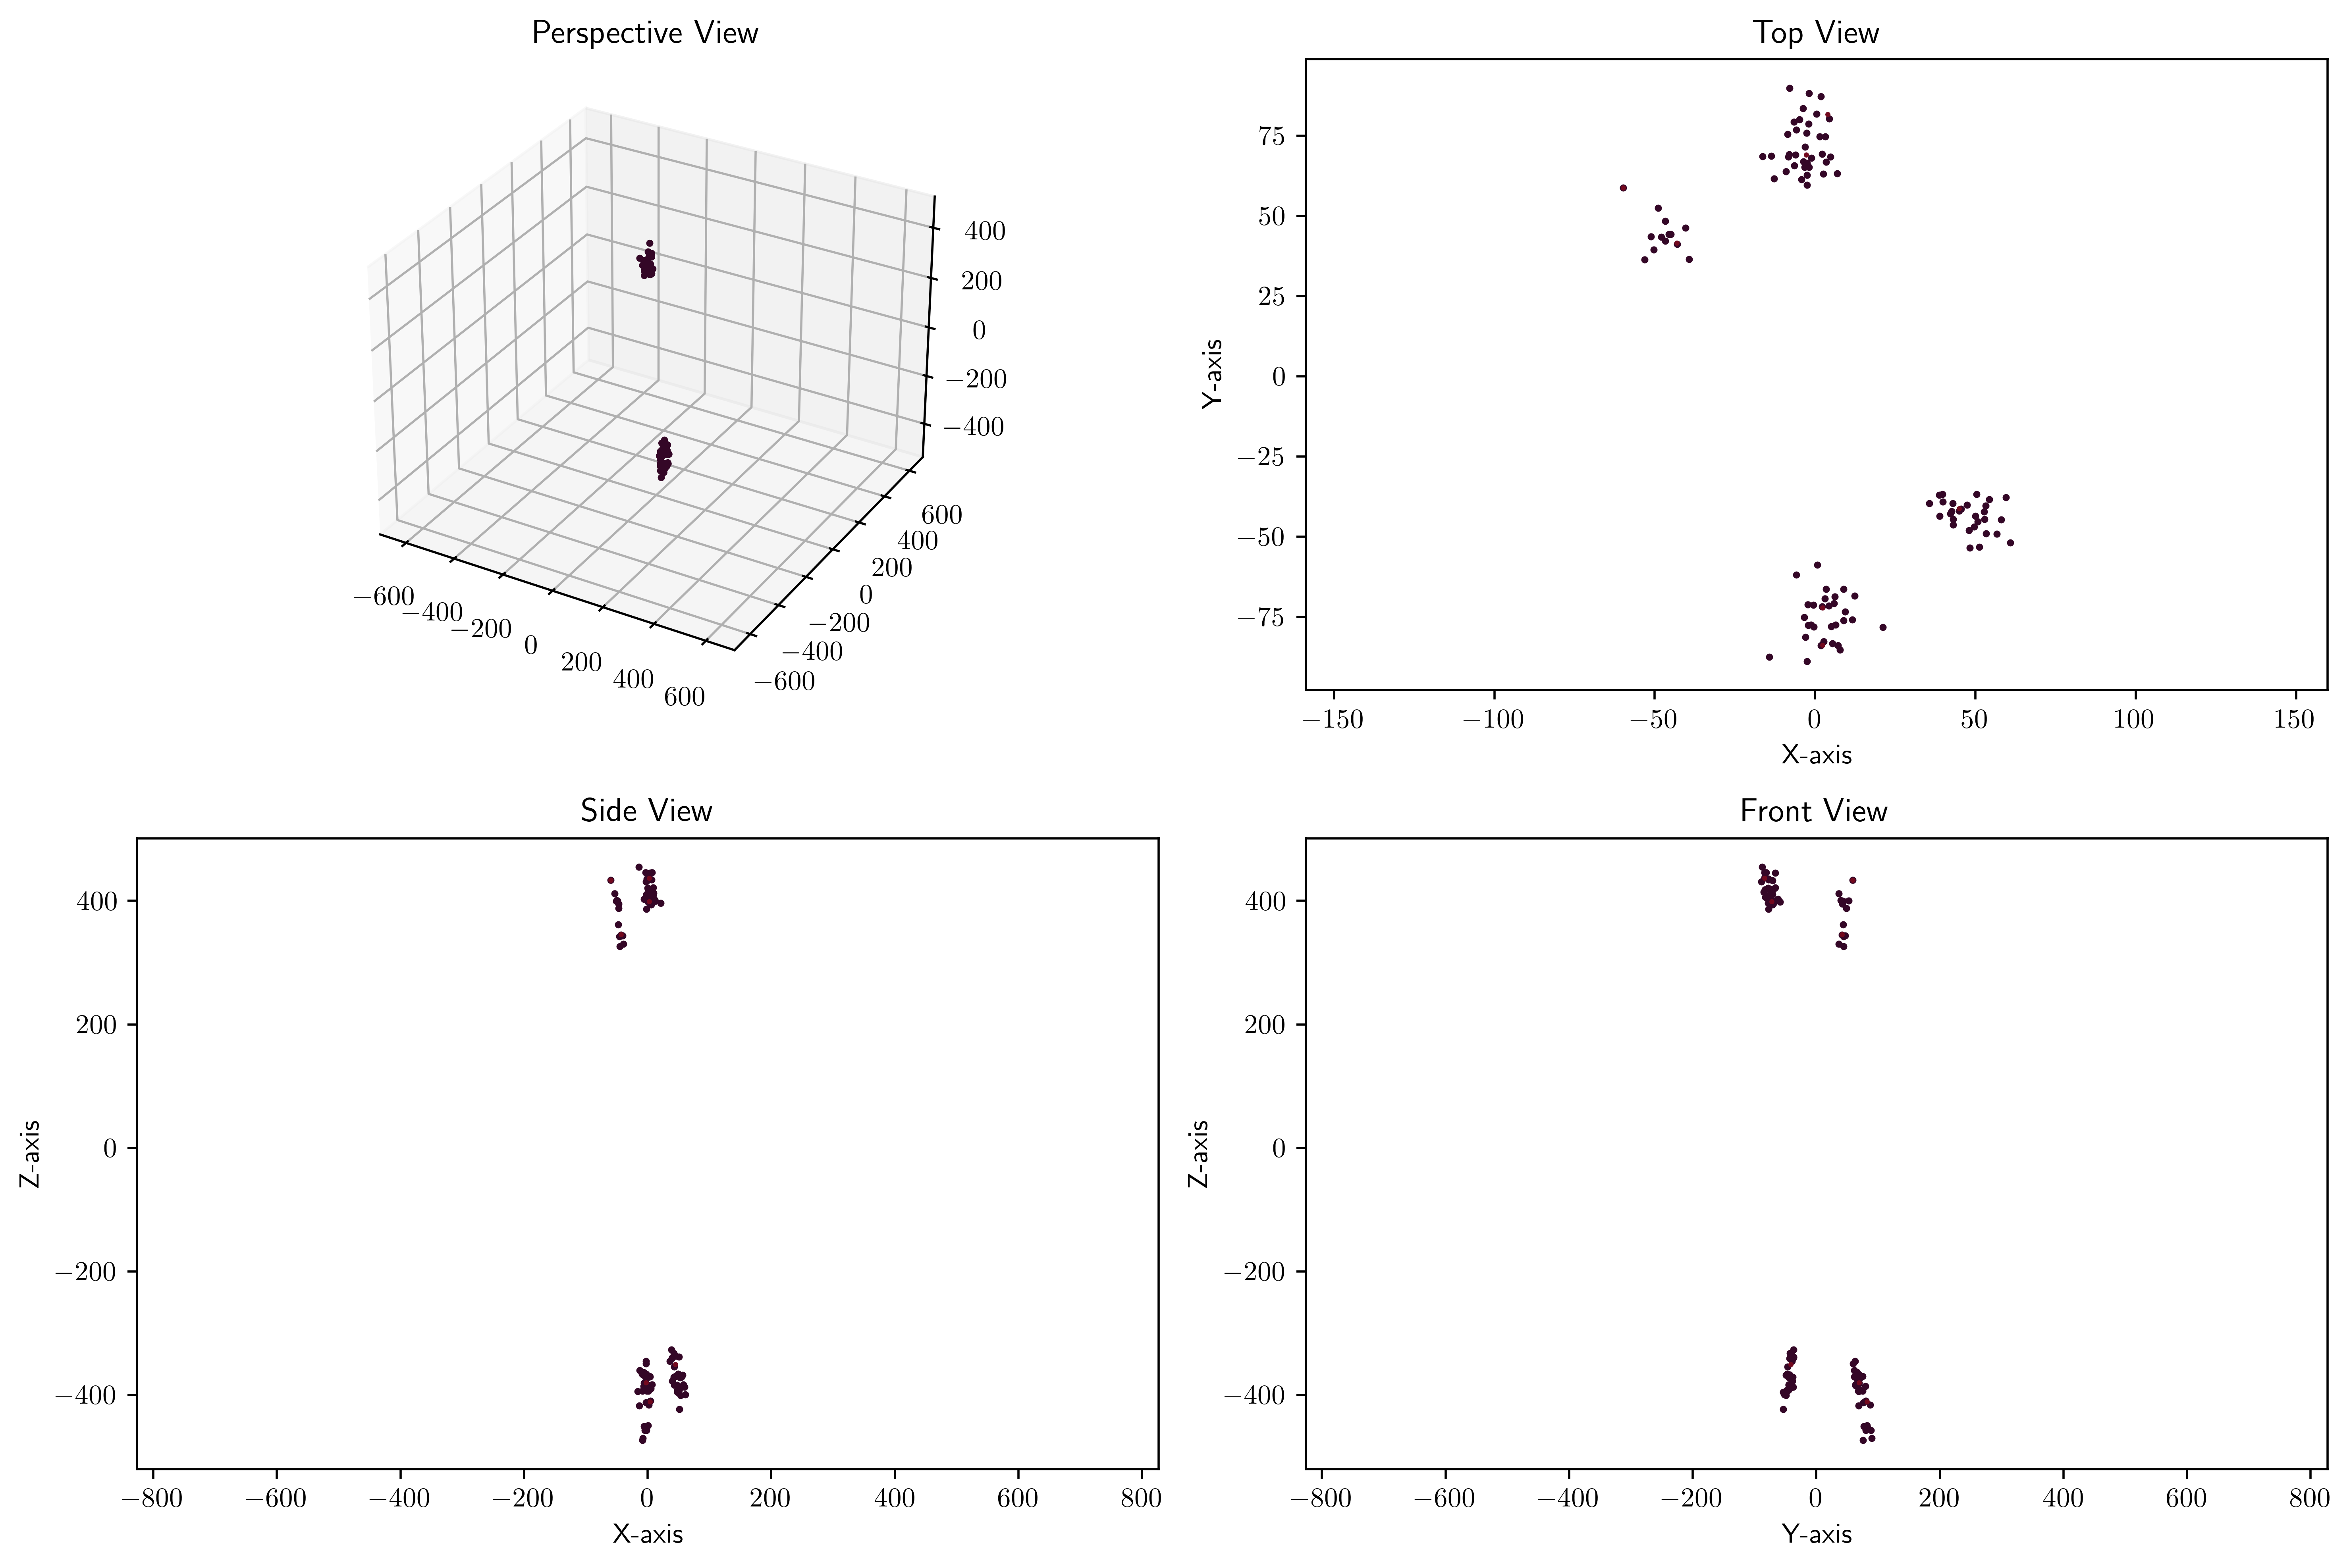

In [29]:
fig = plt.figure(figsize=(12,8), dpi=500)

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for i in [5]:
  col = np.random.rand(3)
  col[2] *= 0.2  # Adjusting the blue channel
  #scatter3D(ak.flatten(bxM[i],axis=0), ak.flatten(bxM[i], axis=0), ak.flatten(bzM[i], axis=0), ax, color=col)
  col2 = np.random.rand(3)
  col2[2] *= 0.2  # Adjusting the blue channel
  te_cut = tErr[i] > -0.5
  plot_point_cloud(ak.flatten(bx[i],axis=0), ak.flatten(by[i], axis=0), ak.flatten(bz[i], axis=0), ax1, ax2, ax3, ax4,s =10, color=col, alpha=1,prefix="tracksters")
  plot_point_cloud(ak.flatten(bxM[i][te_cut],axis=0), ak.flatten(byM[i][te_cut], axis=0), ak.flatten(bzM[i][te_cut], axis=0), ax1, ax2, ax3, ax4,s =3, color=col2, alpha=1,prefix="tracksters")
plt.tight_layout()
plt.show()

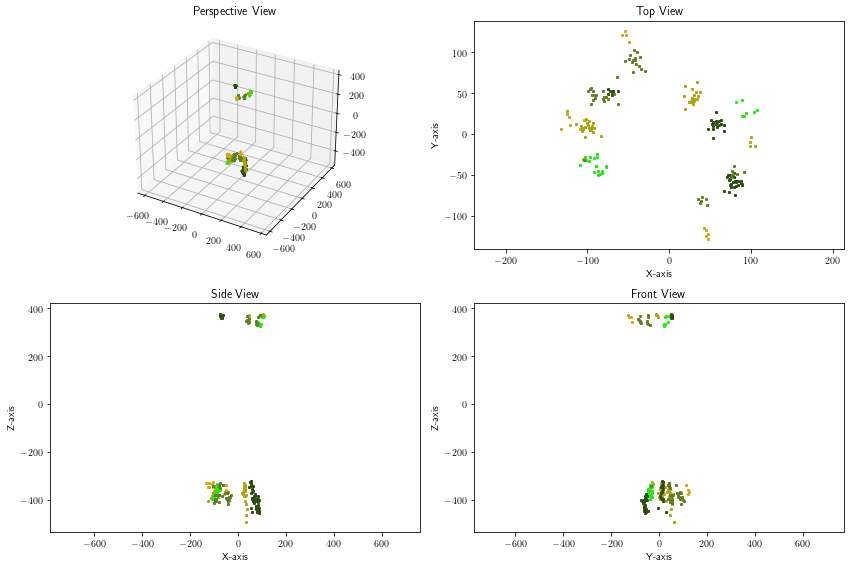

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for i, si in enumerate(simToReco_index[:5]):
  col = np.random.rand(3)
  col[2] *= 0.2  # Adjusting the blue channel
  si = ak.flatten(si)
  plot_point_cloud(bx[i][si], by[i][si], bz[i][si], ax1, ax2, ax3, ax4,s =10, color=col, alpha=1,prefix="tracksters")
plt.tight_layout()
plt.show()

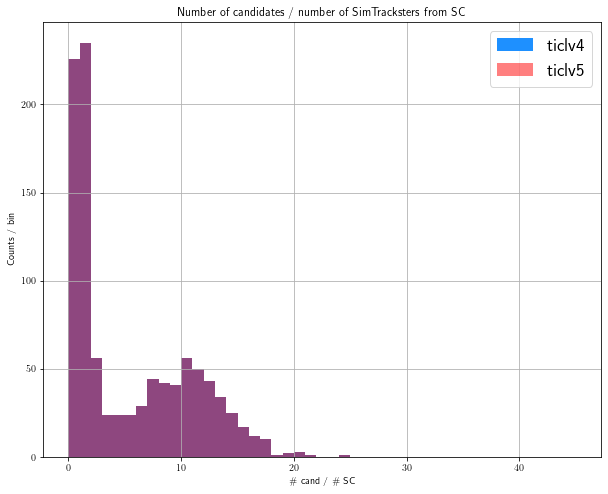

In [31]:
  ticlv5_ncandidates = ak.count(candidate_pdgId, axis=1) / ak.count(SC_trackIdx, axis=1)
  plt.figure(figsize=(10, 8))
  # plt.xlim(-100, 6500)
  myhist(ak.count(candidate_pdgId, axis=1) / ak.count(SC_trackIdx, axis=1), title= "Candidate raw energy", xlabel="# cand / # SC", ylabel = "Counts / bin", bins = 45, label="ticlv4", range=(0,45))
  myhist(ticlv5_ncandidates, title= "Number of candidates / number of SimTracksters from SC", xlabel="\# cand / \# SC", ylabel = "Counts / bin", bins = 45, color="red", alpha=0.5, label="ticlv5", range=(0,45))
  plt.legend(fontsize=18)
  plt.grid()
  plt.show()

CP_bx[2]: [91, 84.7, -80.2, -94.9]
SC_bx[2]: [53.3, 114, -10.3, 132, 59.2, 64.4, 99, ... 43.3, 88.4, 77.8, 84.7, -80.2, -94.9]


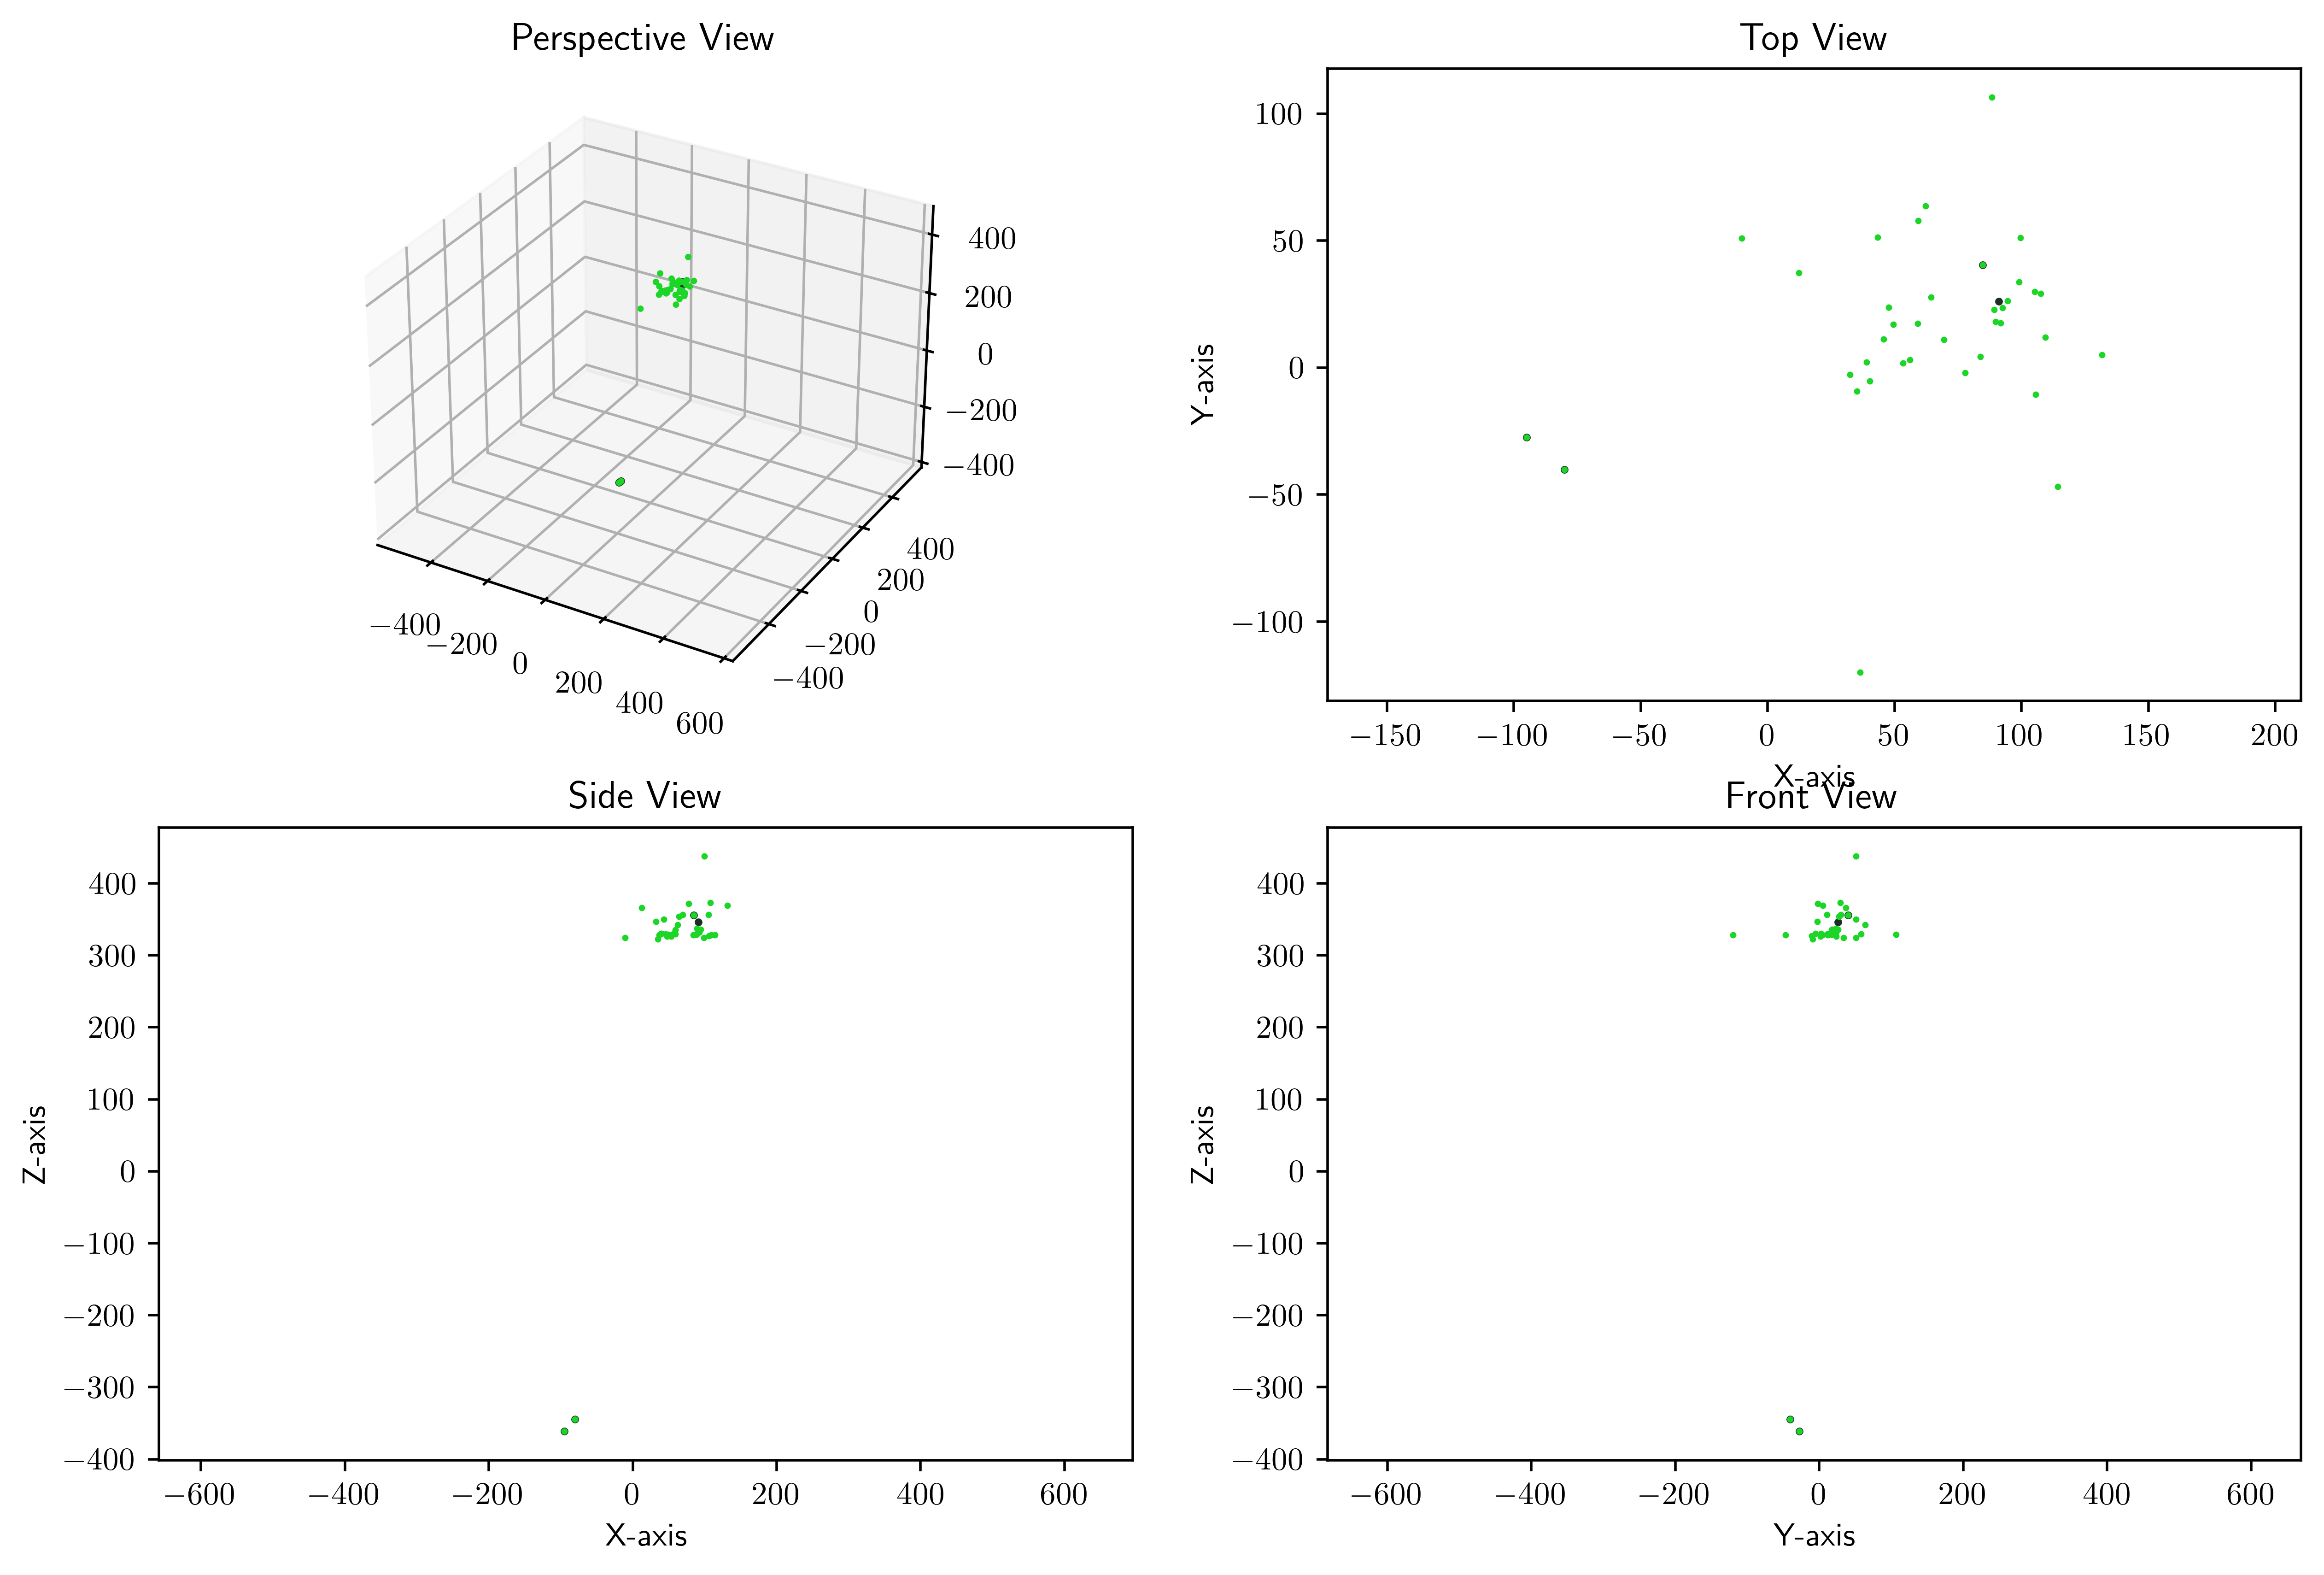

<Figure size 432x288 with 0 Axes>

In [40]:
#make_canvas()

#simtrackstersCP
simCP_bx = simtrackstersCP["barycenter_x"].array()
simCP_by = simtrackstersCP["barycenter_y"].array()
simCP_bz = simtrackstersCP["barycenter_z"].array()
#simtracstersSC
simSC_bx = simtrackstersSC["barycenter_x"].array()
simSC_by = simtrackstersSC["barycenter_y"].array()
simSC_bz = simtrackstersSC["barycenter_z"].array()

# Plotting only the first n events
n= 3

for i in range(2,n):
  fig = plt.figure(figsize=(12,8), dpi=500)
  ax1 = fig.add_subplot(221, projection='3d')
  ax2 = fig.add_subplot(222)
  ax3 = fig.add_subplot(223)
  ax4 = fig.add_subplot(224)
  print(f"CP_bx[{i}]: {CP_bx[i]}")
  print(f"SC_bx[{i}]: {SC_bx[i]}")
  col = np.random.rand(3)
  col[2] *= 0.2 # Adjusting the blue channel
  
  col2 = np.random.rand(3)
  #col2[2] *= 0.2
  
  plot_point_cloud(ak.flatten(CP_bx[i], axis=0), ak.flatten(CP_by[i], axis=0), ak.flatten(CP_bz[i], axis=0), ax1, ax2, ax3, ax4, s=8, color=col)
  plot_point_cloud(ak.flatten(SC_bx[i], axis=0), ak.flatten(SC_by[i], axis=0), ak.flatten(SC_bz[i], axis=0), ax1, ax2, ax3, ax4, s=4, color=col2)
  plt.show()
  plt.clf()

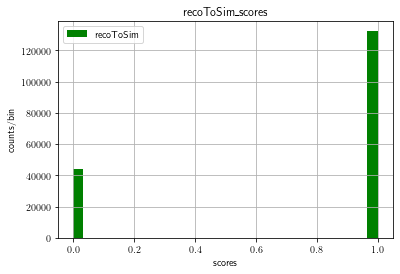

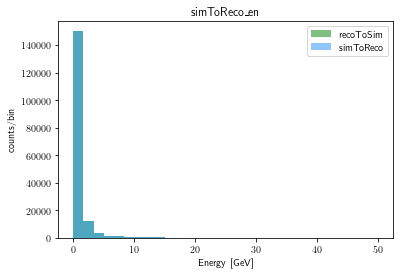

[[33.8, 0, 0, 0], [41, 0, 0, 0], [29, 0, ... 0, 0], [1.06, 0, 0, 0], [1.71, 0, 0, 0]]
[[4.63, 2.74, 2.37, 1.83, 1.76, 1.71, 1.51, 1.19, 0.867, ... 0, 0, 0, 0, 0, 0, 0, 0]]
1.0


In [33]:
myhist(ak.flatten(recoToSim_score, axis=None), title="recoToSim_scores", xlabel="scores", ylabel="counts/bin", bins=30, color='green', label="recoToSim", range=(0,1))
#myhist(ak.flatten(simToReco_score, axis=None), title="simToReco_score", xlabel="scores", ylabel="counts/bin", bins=30, label="simToReco", range=(0,1))
plt.legend(fontsize=10)
plt.show()
plt.clf()
myhist(ak.flatten(recoToSim_en, axis=None), title="recoToSim_en", xlabel="Energy [GeV]", ylabel="counts/bin", bins=30, color='green', label="recoToSim", range=(0,50), alpha=0.5)
myhist(ak.flatten(simToReco_en, axis=None), title="simToReco_en", xlabel="Energy [GeV]", ylabel="counts/bin", bins=30, label="simToReco", range=(0,50), alpha=0.5)
plt.legend(fontsize=10)

plt.show()
print(recoToSim_en[0])
print(simToReco_en[0])
print(ak.max(recoToSim_score))

In [34]:
max_score_s2r = 0.35
min_energy_s2r = 0.5
isPassScore = ((simToReco_score < max_score_s2r) &  (simToReco_en > min_energy_s2r))
print(f"isPassScore: {isPassScore}")
isPass_s2r = ak.flatten(ak.any(isPassScore, axis=2), axis=None)
print(f"isPass_s2r: {isPassScore}")
print(f"simToReco_score[isPassScore]: {simToReco_score[isPassScore]}")
CP_raw_en = simtrackstersCP["raw_energy"].array()
min_energy_s = 0.1
isPass_s = ak.flatten(CP_raw_en > min_energy_s, axis=None)


isPass = isPass_s2r & isPass_s
total_simToReco_tracksters = ak.count_nonzero(simToReco_score)
passed_simToReco_tracksters = ak.count_nonzero(simToReco_score[isPassScore])
passed_simToReco_candidates = ak.count_nonzero(isPass_s2r)

print(f"total_simToReco_tracksters: {total_simToReco_tracksters}")
print(f"passed_simToReco_tracksters: {passed_simToReco_tracksters}")
print(f"passed_simToReco_candidates: {passed_simToReco_candidates}")

energy_ratio= ak.sum(simToReco_en[isPassScore][isPass], axis=1)/CP_raw_en[isPass]


isPassScore: [[[False, False, False, False, False, False, ... False, False, False, False, False]]]
isPass_s2r: [[[False, False, False, False, False, False, ... False, False, False, False, False]]]
simToReco_score[isPassScore]: [[[], [0.203], [], [0.125]], [[0.0968], ... [[], [0.00363], [0.113], [0.0692]]]
total_simToReco_tracksters: 177212
passed_simToReco_tracksters: 2333
passed_simToReco_candidates: 2333


ValueError: in RegularArray attempting to get 1001, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_RegularArray_getitem_next_array_regularize.cpp#L19)

In [ ]:
myhist(energy_ratio, title="Energy ratio", xlabel=r"ratio $E_{RECO}/E_{Sim}$", ylabel="counts/bin",bins=30, label="", range=(0,1))

## Mergetrackters voxels



``` diff
- We have to define all the input maps by tracksterMerged instead of by event.

```

In [ ]:
print(f"etaM: {betaM}")
print(f"phiM: {bphiM}")
brM= np.sqrt(bxM**2+byM**2+bzM**2)
print(f"rM: {brM}")


In [ ]:
clx = clusters["position_x"].array()
cly = clusters["position_y"].array()
clz = clusters["position_z"].array()
cleta = clusters["position_eta"].array()
clphi = clusters["position_phi"].array()
clr = np.sqrt(clx**2+cly**2)

print(clusters.keys())

print(f"ak.min(clz): {ak.min(clz)}")
print(f"ak.max(clz): {ak.max(clz)}")
print(f"ak.min(clphi): {ak.min(clphi)}")
print(f"ak.max(clphi): {ak.max(clphi)}")
print(f"ak.min(cleta[cleta >0]): {ak.min(cleta[cleta>0])}")
print(f"ak.max(cleta): {ak.max(cleta)}")

myhist(ak.flatten(clz, axis=None), title="Clusters z-position", xlabel="z [cm]", ylabel="counts/bin", bins=300, label="", range=(300, 550))
plt.show()
plt.clf()
myhist(ak.flatten(cleta, axis=None), title="Clusters eta-direction (negatives)", xlabel="eta", ylabel="counts/bin",bins=300, label="",range=(-3.,-2.9))
plt.show()
plt.clf()
myhist(ak.flatten(cleta, axis=None), title="Clusters eta=direction", xlabel="eta", ylabel="counts/bin", bins=100, label="", range=(1.35, 3.15))
plt.show()
myhist(ak.flatten(clphi, axis=None), title="Clusters phi-direction", xlabel="phi", ylabel="counts/bin",bins=100, label="",range=(-3.15,3.15))
plt.show()
plt.clf()

In [ ]:
tracksters.keys()

In [35]:


#features_perTracksterMerged 
ftm= ak.ArrayBuilder()

for i in range(len(betaM)):
  betaM_mean = np.mean(betaM[i])
  bphiM_mean = np.mean(bphiM[i])
  bzM_mean = np.mean(bzM[i])
  
  delta_eta= betaM[i]- betaM_mean
  delta_phi= bphiM[i]- bphiM_mean
  delta_z = bzM[i] - bzM_mean

  ftm.append(np.array([np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8])[0],
    np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8], weights =np.asarray(reg_enM[i]))[0]]))
  
ftm = ftm.snapshot()
form, length, container = ak.to_buffers(ftm)
print(container.keys())


with open('grid_array.pkl', 'wb') as f:
  pickle.dump(ftm,f)
#ak.#save("grid.h5", ftm, mode="w")


'''
# Using track as center of the grid
for i, i_eta in enumerate(track_hgcal_eta):
  if len(i_eta)>0 and len(track_hgcal_phi[i])>0 and len(track_hgcal_z)>0:
    #print(f"delta_eta[{i}]: {etaM[i]}")
    #print(f"i_eta: {i_eta}")
    #print(f"delta_eta[{i}]- i_eta: {etaM[i]-i_eta[0]}")
    delta_eta.append(betaM[i]- i_eta[0])
    delta_phi.append(bphiM[i]- track_hgcal_phi[i][0])
    delta_z.append(bzM[i] - track_hgcal_z[i][0])
    #print(reg_enM[i])
    #print(type(reg_enM[i]))
    ftm.append(np.array([np.histogramdd(np.transpose(np.array([betaM[i]- i_eta[0], 
                                                     bphiM[i]- track_hgcal_phi[i][0], 
                                                     bzM[i] - track_hgcal_z[i][0]])), 
                              bins=[8,8,8])[0],
                         np.histogramdd(np.transpose(np.array([betaM[i]- i_eta[0], 
                                                     bphiM[i]- track_hgcal_phi[i][0], 
                                                     bzM[i] - track_hgcal_z[i][0]])), 
                              bins=[8,8,8], weights =np.asarray(reg_enM[i]))[0]]))
ftm = ftm.snapshot()


delta_eta = delta_eta.snapshot()
delta_phi = delta_phi.snapshot()
delta_z = delta_z.snapshot()
ak.max(delta_eta)
ak.max(delta_phi)
np.remainder(ak.max(delta_phi), np.pi)
ak.max(delta_z)

print(ftm.type)
'''
print(ftm.type)
print(ak.max(betaM))
print(ak.min(betaM))
print(ak.min(np.abs(betaM)))

print(np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8])[1])


dict_keys(['part0-node0-offsets', 'part0-node1-offsets', 'part0-node2-offsets', 'part0-node3-offsets', 'part0-node4-data'])
1000 * var * var * var * var * float64
3.077393
-3.120703
1.5230156
[array([-1.98316097, -1.32530367, -0.66744637, -0.00958908,  0.64826822,
        1.30612552,  1.96398282,  2.62184012,  3.27969742]), array([-3.39531064, -2.61574271, -1.83617479, -1.05660686, -0.27703893,
        0.502529  ,  1.28209692,  2.06166485,  2.84123278]), array([-376.72872925, -257.74604416, -138.76335907,  -19.78067398,
         99.20201111,  218.1846962 ,  337.16738129,  456.15006638,
        575.13275146])]


In [ ]:
with open('grid_array.pkl', 'rb') as f:
  ftm_test = pickle.load(f)

print(ftm_test.type)

In [ ]:
myhist(ak.flatten(delta_eta,axis=None), title="Delta eta", xlabel="eta_trackster - eta_track_hgcal", bins=40, range=(0,1.))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=40, range=(0,6.3))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=40, range=(0,1.))
plt.show()
myhist(ak.flatten(delta_z, axis=None), title= "Delta z", xlabel="z_trackster- phi_track_hgcal", bins = 400 , range= (0, 200.))
plt.show()

In [ ]:
myhist(ak.flatten(delta_eta,axis=None), title="Delta eta", xlabel="eta_trackster - eta_track_hgcal", bins=8, range=(0,0.5))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=8, range=(0,0.7))
plt.show()
myhist(ak.flatten(delta_z, axis=None), title= "Delta z", xlabel="z_trackster- phi_track_hgcal", bins = 8 , range= (0, 200.))
plt.show()

In [ ]:
#print(delta_phi[0])
#np.histogramdd(np.array([delta_phi[0], delta_eta[0], delta_z[0]]), bins=[8,8,8])[0]

#features_perTracksterMerged 
ftm= ak.ArrayBuilder()
for i in range(1):
  if len(track_hgcal_eta[i])>0 and len(track_hgcal_phi[i])>0 and len(track_hgcal_z)>0:

    ftm.append(np.histogramdd(np.transpose(np.array([delta_phi[i], delta_eta[i], delta_z[i]])), bins=[8,8,8])[0])
    hist, binedges = np.histogramdd(np.transpose(np.array([delta_phi[i], delta_eta[i], delta_z[i]])), bins=[8,8,8])
    # Setup a 3D figure and add plot points
    fig = plt.figure(figsize=(12,12), dpi=200)
    #plot_multilayers()
   
    
    print(f"ak.min(delta_eta[i]): {ak.min(delta_eta[i])}")
    print(f"ak.max(delta_eta[i]): {ak.max(delta_eta[i])}")
    print(f"ak.min(delta_phi[i]): {ak.min(delta_phi[i])}")
    print(f"ak.max(delta_phi[i]): {ak.max(delta_phi[i])}")
    
    print(f"ak.min(delta_z[i]): {ak.min(delta_z[i])}")
    print(f"ak.max(delta_z[i]): {ak.max(delta_z[i])}")

    
    
    
    '''
    print(delta_phi[i])
    print(delta_eta[i])
    print(delta_z[i])
    
    print(len(delta_phi[i]))
    print(len(delta_eta[i]))
    print(len(delta_z[i]))
    hist2d = np.histogram2d(delta_phi[i], delta_eta[i], bins=8)[0]
    myhist2d(delta_phi[i], delta_eta[i], bins=8, weights=reg_enM[i], title='Regressed energy/bin', xlabel='delta_phi', ylabel='delta_eta')
    plt.colorbar()
    plt.show()
    myhist2d(delta_phi[i], delta_eta[i], bins=8, title='Counts/bin', xlabel='delta_phi', ylabel='delta_eta')
    plt.colorbar()
    plt.show()
    '''
#ftm = ftm.snapshot()
#print(ftm.type)
    
 

## Definition of the Truth

 - HOw are we going to define completeness. Is it by the level of coincidence of the truth and the input features?

In [ ]:
max_score_r2s = 0.35
min_energy_r2s = 0.5
max_score_s2r = 0.35
min_energy_s2r = 0.5
cond_r2s = ((recoToSim_score < max_score_r2s) & (recoToSim_en > min_energy_r2s))
# We can flatten in the following line because we are not looking the link one by one of the simTracksters
# and the tracksters, we are going to select the simTracksters that are linked to any trackster and make the map for the truth
isPass_r2s = ak.flatten(ak.any(cond_r2s, axis=2), axis=None)

cond_s2r = ((simToReco_score < max_score_s2r) & (simToReco_en > min_energy_s2r))
isPass_s2r = ak.flatten(cond_r2s, axis=None)
#isPass_s2r = ak.flatten(ak.any(cond_r2s, axis=1), axis=None)
'''
print(cond_s2r.type)
print(cond_s2r)
print((ak.flatten(cond_s2r, axis=0)).type)
print((ak.flatten(cond_s2r, axis=0)))
print((ak.flatten(cond_s2r, axis=1)).type)
print((ak.flatten(cond_s2r, axis=1)))
print((ak.flatten(cond_s2r, axis=2)).type)
print((ak.flatten(cond_s2r, axis=2)))
'''
print(cond_r2s)
print(ak.any(cond_r2s, axis=1).type)
print(isPass_s2r)
print(isPass_s2r.type)


 - To define completeness we see in the association recoToSim which are the reco tracksters associated with the correct sim trackster, what are the reco tracksters incorrectly assigned to the a simTrackster
 

In [ ]:
TICLCandidate.keys()


In [ ]:
print(len(ak.flatten(TICLCandidate["tracksters_in_candidate"].array(), axis=None)))

In [ ]:
f1 = ak.from_parquet("fTsM_1D.parquet")

In [ ]:
print(f1.type)

In [ ]:
print(f1[0])